# Génération de partition de musique : réseau LSTM

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
import os
import json

In [3]:
sys.path.append('/content/drive/MyDrive/M2 IAFA/CHEF D\'OEUVRE/LSTM')
sys.path.append('/content/drive/MyDrive/M2 IAFA/CHEF D\'OEUVRE/data')
sys.path.append('/content/drive/MyDrive/M2 IAFA/CHEF D\'OEUVRE')

In [4]:
from melodypreprocessor import *
from melodygenerator import *
from LSTM import *
from train import *
from extract_data import *
from visualization import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

import matplotlib.pyplot as plt

In [5]:
melody_preprocessor = MelodyPreprocessor("/content/drive/MyDrive/M2 IAFA/CHEF D\'OEUVRE/data/datasetA.json", batch_size=32)
train_dataset = melody_preprocessor.create_training_dataset()
vocab_size = melody_preprocessor.number_of_tokens_with_padding
max_length_melody = melody_preprocessor.max_melody_length

print("Taille du vocabulaire :",vocab_size)
print("Taille de la plus grande mélodie :",max_length_melody)

Taille du vocabulaire : 317
Taille de la plus grande mélodie : 249


### Modèle LSTM

In [6]:
embedding_dim = 64
model = LSTMModel(vocab_size,embedding_dim,max_length_melody)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
epochs = 30
iters,losses = train(train_dataset,model,epochs)

Training the model ...


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 26 Batch 651 Loss 0.8015188574790955
Epoch 26 Batch 652 Loss 0.6584505438804626
Epoch 26 Batch 653 Loss 1.0433571338653564
Epoch 26 Batch 654 Loss 0.719817578792572
Epoch 26 Batch 655 Loss 0.9615432620048523
Epoch 26 Batch 656 Loss 0.8270179033279419
Epoch 26 Batch 657 Loss 0.8288781046867371
Epoch 26 Batch 658 Loss 0.7061832547187805
Epoch 26 Batch 659 Loss 0.7815856337547302
Epoch 26 Batch 660 Loss 0.6963493824005127
Epoch 26 Batch 661 Loss 0.4829561412334442
Epoch 26 Batch 662 Loss 0.672894299030304
Epoch 26 Batch 663 Loss 0.8113992810249329
Epoch 26 Batch 664 Loss 0.5669896602630615
Epoch 26 Batch 665 Loss 0.8221277594566345
Epoch 26 Batch 666 Loss 0.7029888033866882
Epoch 26 Batch 667 Loss 0.7375397086143494
Epoch 26 Batch 668 Loss 0.918479323387146
Epoch 26 Batch 669 Loss 0.8542008996009827
Epoch 26 Batch 670 Loss 0.8034968972206116
Epoch 26 Batch 671 Loss 0.8392929434776306
Epoch 26 Batch 672 Los

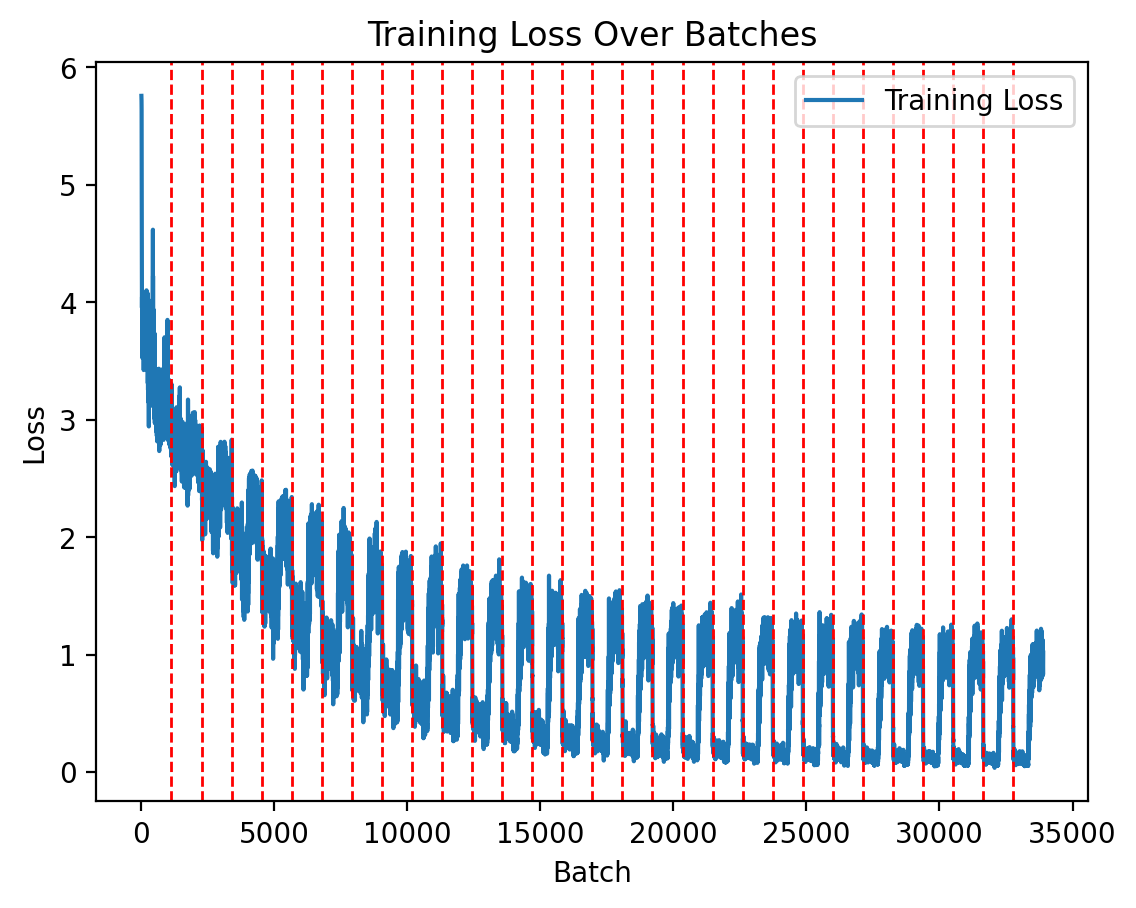

In [8]:
def plot_losses(iters,losses):
    plt.plot(iters,losses, label='Training Loss')
    for i in range(1130,len(iters),1130):
        plt.axvline(x=i, color='r', linestyle='--', linewidth=1)
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Batches')
    plt.legend()
    plt.show()

plot_losses(iters,losses)

In [9]:
k = 6

seq = extract_random_seq("/content/drive/MyDrive/M2 IAFA/CHEF D\'OEUVRE/data/data.json",k)
print("Séquence initiale :\n",seq)
print()
original = extract_seq_from("/content/drive/MyDrive/M2 IAFA/CHEF D\'OEUVRE/data/data.json",seq[0],seq[1])
print("Séquence d'origine :\n",original)

B
Séquence initiale :
 ['FLOR  AMOROSA', '2/4', 'B', 'F major', ['C5-0.25', 'C5-0.25', 'B4-0.25', 'B-4-0.25', 'A4-0.25', 'A4-0.25']]

La partie 2/4 de la partition FLOR  AMOROSA n'existe pas.
Séquence d'origine :
 ()


In [10]:
melody_generator = MelodyGenerator(model,melody_preprocessor.tokenizer,60)

In [11]:
T=2

print("Generating a melody...")

new_melody,proba1 = melody_generator.generate(seq[-1],mode=0)
new_melody2,proba2 = melody_generator.generate(seq[-1],mode=1,temperature=T)
new_melody3,proba3 = melody_generator.generate(seq[-1],mode=2,k=20)

print("new melody1 :"," ".join(seq[-1])+" "+new_melody)
print()
print("new melody2 :"," ".join(seq[-1])+" "+new_melody2)
print()
print("new melody3 :"," ".join(seq[-1])+" "+new_melody3)

Generating a melody...
new melody1 : C5-0.25 C5-0.25 B4-0.25 B-4-0.25 A4-0.25 A4-0.25 C5-0.25 C5-0.25 B4-0.25 B-4-0.25 A4-0.25 A4-0.25  A4-0.25  E4-0.25  A4-0.25  A4-1.0  rest-0.25  F4-0.25  G#4-0.25  B4-0.25  D5-0.25  F5-0.25  E5-0.25  A4-0.25  A4-0.25  A4-0.25  E4-0.25  A4-0.25  A4-1.0  rest-0.25  F4-0.25  G#4-0.25  B4-0.25  D5-0.25  F5-0.25  E5-0.25  G5-0.25  G5-1.0  G5-0.25  B-5-0.5  A5-0.25  G5-0.25  G-5-0.25  F5-0.25  B5-0.25  B5-0.25  A5-0.5  G-5-0.25  F5-0.25  E5-0.25  D5-0.25  A5-0.25  A5-1.0  rest-0.25  E-5-0.25  C5-0.25  F4-0.25  A4-0.25  C5-0.25  D5-0.25  C5-0.25  A4-0.25  C5-0.25  F5-0.25  C5-0.25  A4-0.25

new melody2 : C5-0.25 C5-0.25 B4-0.25 B-4-0.25 A4-0.25 A4-0.25 C5-0.25 C5-0.25 B4-0.25 B-4-0.25 A4-0.25 A4-0.25  F5-0.25  B-5-0.25 C#4-0.25  G3-0.5  D5-0.25  D-4-0.5 A4-1.0  A#4-1.0  G5-0.125 B-3-0.25  E#3-0.25  A#5-0.25  C#4-0.25  A6-0.25 B-4-0.25  F#6-1.0  C6-0.5  B4-0.5  F#5-0.25  A-4-0.5  E-3-0.25  F#5-0.125 B5-2.0  F6-0.25  C#4-0.125  G6-2.0  C-5-0.25 A4-0.5  B#4-0

In [12]:
melodies_generated=[]

In [13]:
k = 8

for _ in range(30):
    print("Generating a melody...")
    seq = extract_random_seq("/content/drive/MyDrive/M2 IAFA/CHEF D\'OEUVRE/data/data.json",k,"A")
    original = extract_seq_from("/content/drive/MyDrive/M2 IAFA/CHEF D\'OEUVRE/data/data.json",seq[0],seq[2])
    new_melody,p = melody_generator.generate(seq[-1],mode=2,k=40)
    melodies_generated.append((seq,new_melody,original,p))

Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A


In [14]:
generated = [ {'Title' : s[0] , 'Part': s[2], 'Key' : s[3] ,'Start_sequence' :s[4] ,'Proba': [ str(proba) for proba in p] ,'Generated' : m.split() , 'Original' : o[-1]} for (s,m,o,p) in melodies_generated ]
print(len(generated))

30


In [15]:
with open("/content/drive/MyDrive/M2 IAFA/CHEF D\'OEUVRE/Generated/generated.json","w") as f:
    json.dump(generated,f,indent=2)